<a href="https://colab.research.google.com/github/meganlcole327/MLA_MLC/blob/main/MLA5_MLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Assignment 5

Megan Cole

CS430-ON

Ensemble Methods and Random Forest Classification

#Standard Imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for Ensemble Learning and Random Forests

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#Other Classifiers

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Imports for Splitting Data and Building Pipeline

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [39]:
from sklearn import set_config
set_config(display='diagram')


#Imports for Performance Measures

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


#Confusion Matrix Function

In [41]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')


#ROC_Function Curve

In [42]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])


#Problem 1

#Aquire Data

In [11]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/BU/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/BU/CS430/landsat_test.csv')

landsat_train.head()
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


#Statistics and Visual Exploration

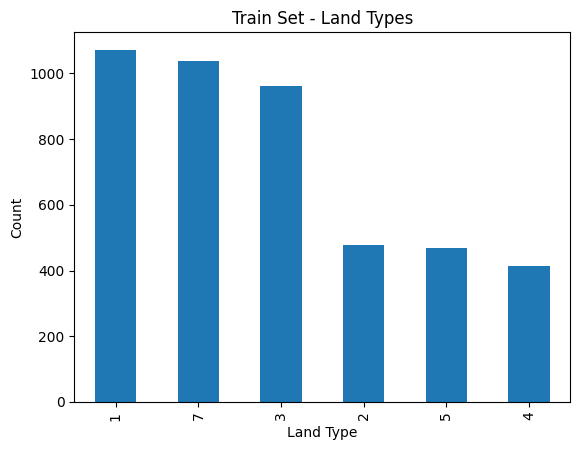

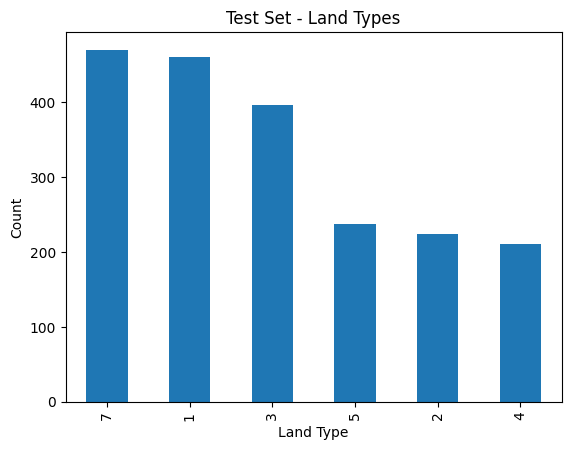

In [12]:
#landsat_train
landsat_train['land_type'].value_counts().plot(kind='bar', title = 'Train Set - Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

#landsat_test
landsat_test['land_type'].value_counts().plot(kind='bar', title = 'Test Set - Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

#Splitting Data into Test/Train

In [13]:
X_train = landsat_train.drop(columns=['land_type'])
y_train = landsat_train['land_type']
X_test = landsat_test.drop(columns=['land_type'])
y_test = landsat_test['land_type']

#Building the Pipeline

In [16]:
numerical_features = X_train.columns
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features)
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

#Executing the Model

In [17]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

#Evaluating the Model

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.99      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.92      0.91      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



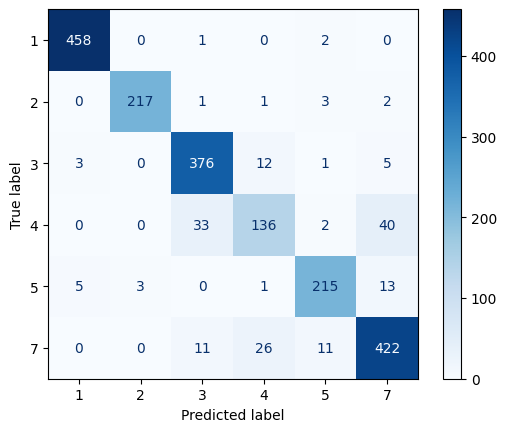

In [28]:
y_pred = pipeline_rf.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

#Conclusion

The Random Forect Classifier performed well in classifying land types using the satellite data. The percesion, recall, and F1 classes indicated a high level of accuracy and generalizablility. The confusion matrix showed relatively few miscalifications as well. This indicates that the model effectively captures the complex patterns. Overall the random forest seems to work well for this type of problem.

#Problem 2 - Bagging

#Aquire Data

Using the same data as problem 1.

#Statistics and Visual Exploration

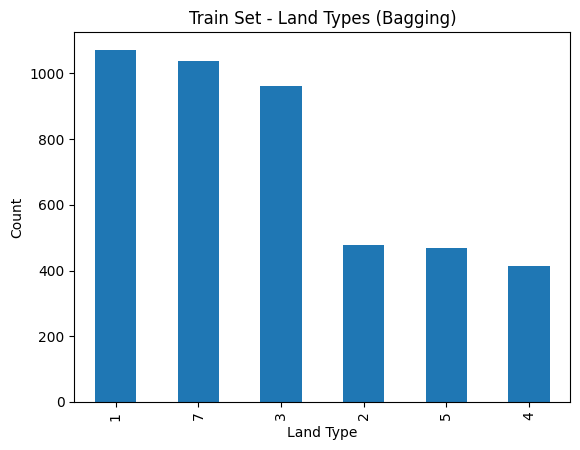

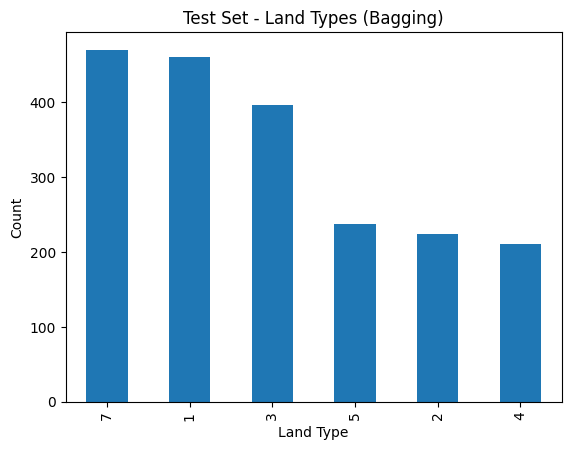

In [20]:
# landsat_train
landsat_train['land_type'].value_counts().plot(kind='bar', title='Train Set - Land Types (Bagging)')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

# landsat_test
landsat_test['land_type'].value_counts().plot(kind='bar', title='Test Set - Land Types (Bagging)')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()


#Splitting the Data

In [24]:
X_train = landsat_train.drop(columns=['land_type'])
y_train = landsat_train['land_type']
X_test = landsat_test.drop(columns=['land_type'])
y_test = landsat_test['land_type']

#Build the Pipeline

In [25]:
#Scaling
numerical_features = X_train.columns
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features)
])

#Pipeline with the bagging classifier
pipeline_bagging = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42))
])

#Execute the Model

In [26]:
pipeline_bagging.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   n_estimators=100, random_state=42))])

#Evaluate the model

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.96      0.97       224
           3       0.87      0.95      0.91       397
           4       0.75      0.65      0.70       211
           5       0.91      0.86      0.89       237
           7       0.88      0.88      0.88       470

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.89      2000
weighted avg       0.90      0.90      0.90      2000



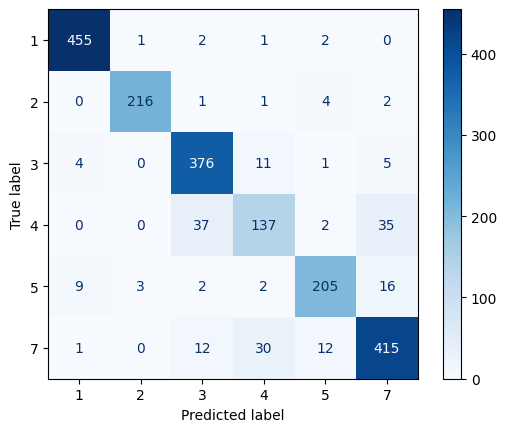

In [27]:
y_pred_bagging = pipeline_bagging.predict(X_test)

print(classification_report(y_test, y_pred_bagging))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bagging, cmap='Blues')
plt.show()

#Conclusion

The Bagging Classifier also had a strong performance on the Landsat dataset. It was very comparable to the random forest model. However, thd bagging classifier was a little less constent. It seems to be a good option to use for land classification; however, the random forest model may give slightly better performances.

#Problem 3

#Aquire Data

In [29]:
banknote_df = pd.read_csv('/content/drive/MyDrive/BU/CS430/banknote_authentication.csv')

In [30]:
print(banknote_df.info())
print(banknote_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   forgery   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
          variance     skewness     curtosis      entropy      forgery
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.0000

In [43]:
banknote_df.columns = banknote_df.columns.str.strip()


In [44]:
print(banknote_df.columns)

Index(['variance', 'skewness', 'curtosis', 'entropy', 'forgery'], dtype='object')


#Statistics and Visual Exploration

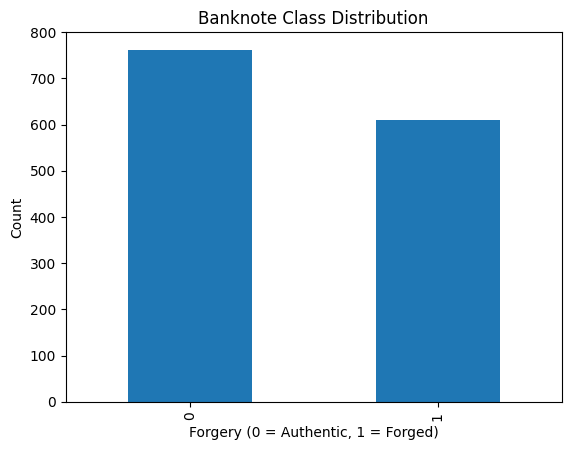

In [45]:
banknote_df['forgery'].value_counts().plot(kind='bar', title='Banknote Class Distribution')
plt.xlabel('Forgery (0 = Authentic, 1 = Forged)')
plt.ylabel('Count')
plt.show()

#Split the data

In [46]:
X = banknote_df.drop(columns=['forgery'])
y = banknote_df['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build the Pipeline

In [47]:
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), X.columns)
])

pipeline_rf_banknote = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

#Execute the Model

In [48]:
pipeline_rf_banknote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

#Evaluate the Model

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



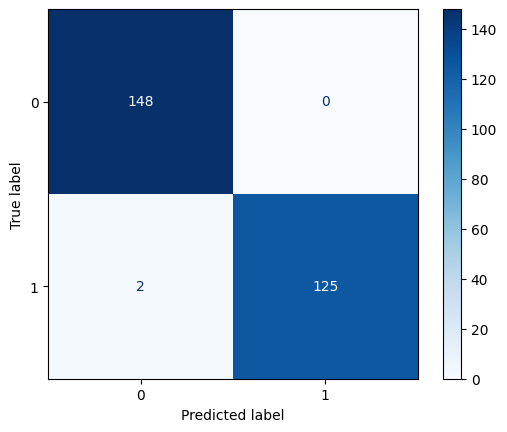

In [49]:
y_pred = pipeline_rf_banknote.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

#Conclusion

The random forest classifier was highly effective at identifying forged banknotes. The classification shows really good precision and recall for both classes, adn the confusion matrix appeared to be very accurate as well. This shows that the model would work well for similar projects and could be a good use.